In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


Shape of X: (70000, 784)
Shape of y: (70000,)


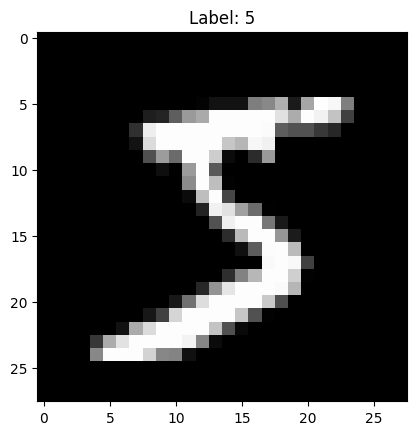

In [10]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int8)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

some_digit = X.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(some_digit, cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9672857142857143



Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



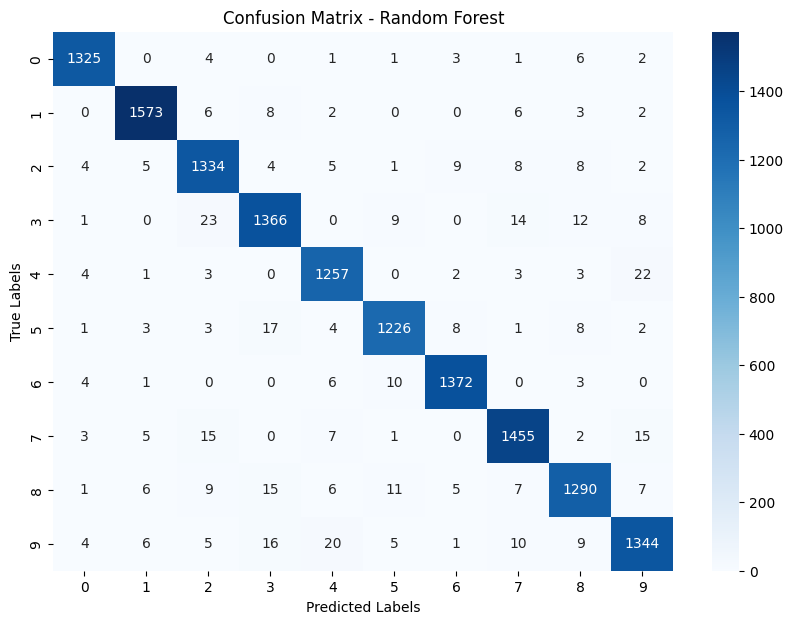

In [15]:
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


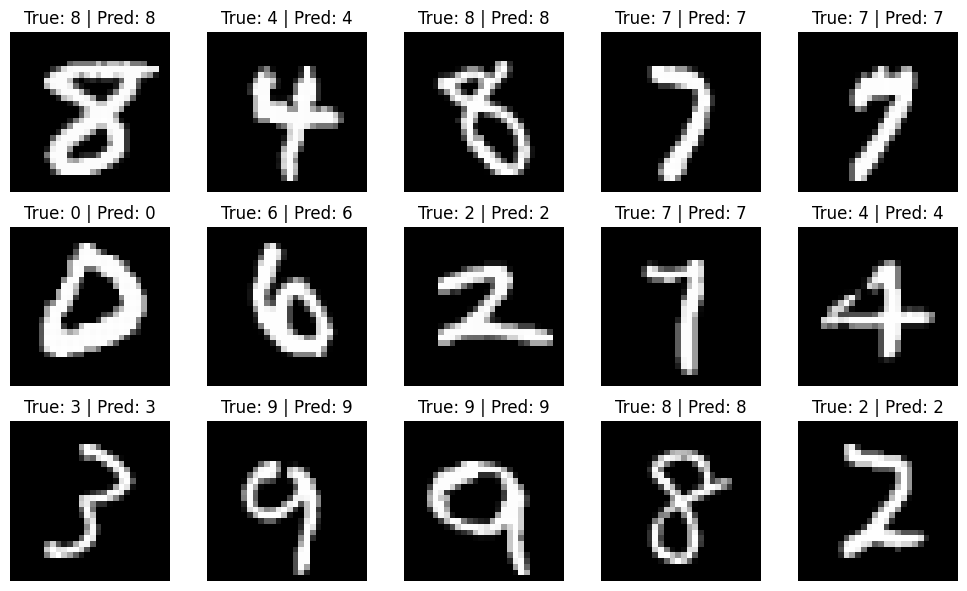

In [16]:
fig, axes = plt.subplots(3, 5, figsize=(10,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.iloc[i].to_numpy().reshape(28,28), cmap='gray')
    ax.set_title(f"True: {y_test.iloc[i]} | Pred: {y_pred_rf[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
